# Data Jam - July Edition

We were focused on interrogating and visualizing data from [Code.gov](code.gov).  While the hope was that we would all work on different data from the public API, unfortunately the library firewall prevented access to the API's reference docs. Given that, we all worked on the same [JSON file](https://github.com/houstondatavis/data-jam-July-2019/blob/master/all_repos_with_nesting.json) which had been slightly cleaned by Justin Gosses.

After exploring the data a bit, I started asking questions about the rate of project creation across all agencies. This is an edited version of what I worked on during the Data Jam.

[MeetUp Event Post](https://www.meetup.com/Houston-Data-Visualization-Meetup/events/262874684/?_xtd=gatlbWFpbF9jbGlja9oAJGMxMWQzOTU1LWY2YTgtNDkyZi1iYjMzLWZmMzY5MzhjNGNiMg&_af=event&_af_eid=262874684)

[Data Jam GitHub Repo](https://github.com/houstondatavis/data-jam-July-2019)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import json

%matplotlib inline
pd.options.display.max_columns = 30
sns.set_style('whitegrid')

In [2]:
data = pd.read_json('all_repos_with_nesting.json')
print(data.shape)
data.head()

(6767, 25)


,agency,contact,date,description,disclaimerText,disclaimerURL,downloadURL,homepageURL,laborHours,languages,name,organization,partners,permissions,relatedCode,repoID,repositoryURL,reusedCode,score,searchScore,status,tags,targetOperatingSystems,vcs,version
0,"{'name': 'Department of the Treasury', 'acrony...",{'URL': 'https://fedspendingtransparency.githu...,"{'created': '2019-06-05T00:00:00.000Z', 'lastM...",The DATA Act broker backend is a collection of...,The Creative Commons CC0 Public Domain Dedicat...,https://github.com/fedspendingtransparency/dat...,https://github.com/fedspendingtransparency/dat...,https://broker.usaspending.gov/,1.0,"[HTML, CSS, Python]",data-act-broker-backend,Bureau of the Fiscal Service(BFS),NaN,{'licenses': [{'name': 'Creative Commons Zero ...,NaN,treasury_bureau_fiscal_service_bfs_1_data_act_...,https://github.com/fedspendingtransparency/dat...,NaN,8.2,1,Development,"[spending, government, transparency, broker, g...",NaN,git,1.0.0
1,"{'name': 'Department of the Treasury', 'acrony...",{'URL': 'https://fedspendingtransparency.githu...,"{'created': '2019-06-05T00:00:00.000Z', 'lastM...",The DATA Act broker website is the front-end t...,The Creative Commons CC0 Public Domain Dedicat...,https://github.com/fedspendingtransparency/dat...,https://github.com/fedspendingtransparency/dat...,https://fedspendingtransparency.github.io/,1.0,"[HTML, CSS, JavaScript]",data-act-broker-web-app,Bureau of the Fiscal Service(BFS),NaN,{'licenses': [{'name': 'Creative Commons Zero ...,NaN,treasury_bureau_fiscal_service_bfs_1_data_act_...,https://github.com/fedspendingtransparency/dat...,NaN,8.2,1,Development,"[spending, government, transparency, github]",NaN,git,1.0.0
2,"{'name': 'Department of the Treasury', 'acrony...",{'URL': 'https://fedspendingtransparency.githu...,"{'created': '2019-06-05T00:00:00.000Z', 'lastM...",This collaboration space is designed to make f...,The Creative Commons CC0 Public Domain Dedicat...,https://github.com/fedspendingtransparency/fed...,https://github.com/fedspendingtransparency/fed...,https://github.com/fedspendingtransparency,1.0,"[HTML, CSS]",federal spending transparency,Bureau of the Fiscal Service(BFS),NaN,{'licenses': [{'name': 'Creative Commons Zero ...,NaN,treasury_bureau_fiscal_service_bfs_1_federal_s...,https://github.com/fedspendingtransparency/fed...,NaN,8.1,1,Development,"[spending, government, transparency, Federal, ...",NaN,git,1.0.0
3,"{'name': 'Department of the Treasury', 'acrony...",{'URL': 'https://fedspendingtransparency.githu...,"{'created': '2019-06-05T00:00:00.000Z', 'lastM...",An RESTful API for U.S. federal spending data....,This project is in the public domain within th...,https://github.com/fedspendingtransparency/fed...,https://github.com/fedspendingtransparency/usa...,https://github.com/fedspendingtransparency,1.0,"[PostgreSQL, Python]",usa spending api,Bureau of the Fiscal Service(BFS),NaN,{'licenses': [{'name': 'Creative Commons Zero ...,NaN,treasury_bureau_fiscal_service_bfs_1_usa_spend...,https://github.com/fedspendingtransparency/usa...,NaN,8.1,1,Development,"[spending, government, transparency, API, github]",NaN,git,1.0.0
4,"{'name': 'National Security Agency', 'acronym'...","{'email': 'cybersecurity_requests@nsa.gov', 'U...","{'created': '2015-05-01T00:00:00.000Z', 'metad...",Configuration guidance for implementing applic...,NaN,NaN,https://github.com/nsacyber/AppLocker-Guidance...,https://github.com/nsacyber/AppLocker-Guidance,1.0,"[PowerShell, Batchfile]",AppLocker-Guidance,NaN,NaN,{'licenses': [{'URL': 'https://github.com/nsac...,NaN,nsa_1_applocker_guidance,https://github.com/nsacyber/AppLocker-Guidance,NaN,7.1,1,Production,"[windows, applocker, whitelisting, application...",NaN,git,NaN


In [3]:
# Interrogating the nested JSON structure of the first row

for col in range(25):
    print(data.columns[col])
    if type(data.iloc[0, col]) is dict:
        print(json.dumps(data.iloc[0, col], indent=4))
    else:
        print(data.iloc[0, col])
    print('\n')

agency
{
    "name": "Department of the Treasury",
    "acronym": "TREASURY",
    "website": "https://www.treasury.gov/",
    "codeUrl": "https://www.treasury.gov/code.json",
    "fallback_file": "TREASURY.json",
    "requirements": {
        "agencyWidePolicy": 1,
        "openSourceRequirement": 0,
        "inventoryRequirement": 0,
        "schemaFormat": 0.5,
        "overallCompliance": 0.33333333333333304
    },
    "complianceDashboard": true
}


contact
{
    "URL": "https://fedspendingtransparency.github.io/",
    "email": "Renata.Maziarz@fiscal.treasury.gov",
    "name": "Renata Maziarz",
    "phone": "(202) 874-5732"
}


date
{
    "created": "2019-06-05T00:00:00.000Z",
    "lastModified": "2019-06-05T00:00:00.000Z"
}


description
The DATA Act broker backend is a collection of services that power the DATA Act's central data submission platform. To increase access to and use of federal financial data in order to strengthen government-wide decision-making and accountability t

In [4]:
data['acronym'] = data['agency'].apply(lambda x: x['acronym'])
data['acronym'].value_counts()

GSA         2058
DOE         1506
NASA        1239
VA           491
CFPB         261
DOL          174
HUD          172
EPA          138
DOT          132
SSA          131
DHS          124
HHS           56
DOJ           55
NSA           54
ED            49
NSF           32
USDA          21
NARA          19
DOD           14
SBA           14
FEC            7
TREASURY       6
EOP            5
DOC            3
OPM            3
USAID          2
NRC            1
Name: acronym, dtype: int64

We have data from 27 unique government agencies. There is a large range in number of published projects per agency.

## Date cleaning

Let's start diving into the nested date JSON element.

In [5]:
def created(x):
    '''Finding and converting the project creation dates to datetimes'''
    if (type(x) is dict) and ('created' in x.keys()):
        return pd.to_datetime(x['created'])
    else:
        return np.NaN

data['createDate'] = data['date'].apply(lambda x: created(x))

In [6]:
data['createDate'].sample(10)

3277   2018-02-14
6222          NaT
5899          NaT
5313          NaT
5684          NaT
1647   2016-07-05
638    2015-12-22
4552   2017-04-25
865    2018-03-26
5476   2019-01-23
Name: createDate, dtype: datetime64[ns]

Looks like we have valid date conversions with some missing data.  Now let's get a sample of the `date` to find some of the other JSON keys.

In [7]:
data['date'].sample(25)

874     {'created': '2018-10-23T00:00:00.000Z', 'lastM...
2314    {'created': '2018-09-20T00:00:00.000Z', 'lastM...
2586    {'created': '2018-10-30T00:00:00.000Z', 'metad...
4892    {'created': '2018-08-30T00:00:00.000Z', 'lastM...
1022    {'created': '2016-11-17T00:00:00.000Z', 'lastM...
1113    {'created': '2016-06-02T00:00:00.000Z', 'lastM...
1009    {'created': '2016-12-09T00:00:00.000Z', 'lastM...
163     {'created': '2017-01-23T00:00:00.000Z', 'lastM...
2030    {'created': '2018-09-19T00:00:00.000Z', 'metad...
4247    {'metadataLastUpdated': '2017-08-23T00:00:00.0...
2242    {'created': '2018-08-09T00:00:00.000Z', 'lastM...
3523    {'created': '2014-11-04T00:00:00.000Z', 'lastM...
2833    {'created': '2017-10-25T00:00:00.000Z', 'metad...
3901    {'created': '2019-01-28T00:00:00.000Z', 'metad...
3689    {'created': '2017-10-25T00:00:00.000Z', 'metad...
3194    {'created': '2017-10-25T00:00:00.000Z', 'metad...
4430    {'metadataLastUpdated': '2014-04-15T00:00:00.0...
3300    {'crea

In [8]:
def timestamp_count(x):
    '''Returns the number of keys present within df['date']'''
    if (type(x) is dict):
        return len(x.keys())
    else:
        return 0 
    
data['dateCounts'] = data['date'].apply(lambda x: timestamp_count(x))

In [9]:
data['dateCounts'].value_counts()

2    3841
0    1402
1    1248
3     276
Name: dateCounts, dtype: int64

Looks like we have two other JSON keys present -- `lastModified` and `metadataLastUpdated`.  Let's clean those too.

In [10]:
def modified(x):
    '''Finding and converting the project modified dates to datetimes'''
    if (type(x) is dict) and ('lastModified' in x.keys()):
        return pd.to_datetime(x['lastModified'])
    else:
        return np.NaN

def metamodified(x):
    '''Finding and converting the metadata modified dates to datetimes'''
    if (type(x) is dict) and ('metadataLastUpdated' in x.keys()):
        return pd.to_datetime(x['metadataLastUpdated'])
    else:
        return np.NaN
    
data['modifyDate'] = data['date'].apply(lambda x: modified(x))
data['metaModifyDate'] = data['date'].apply(lambda x: metamodified(x))

## Visualization

Now that we have some project dates, let's plot them up.  We'll start with **GSA** given that they have the most projects published.

In [11]:
# DataFrame of GSA data only
gsa = data[data['acronym'] == 'GSA']

gsa = gsa.sort_values(by='createDate').reset_index()

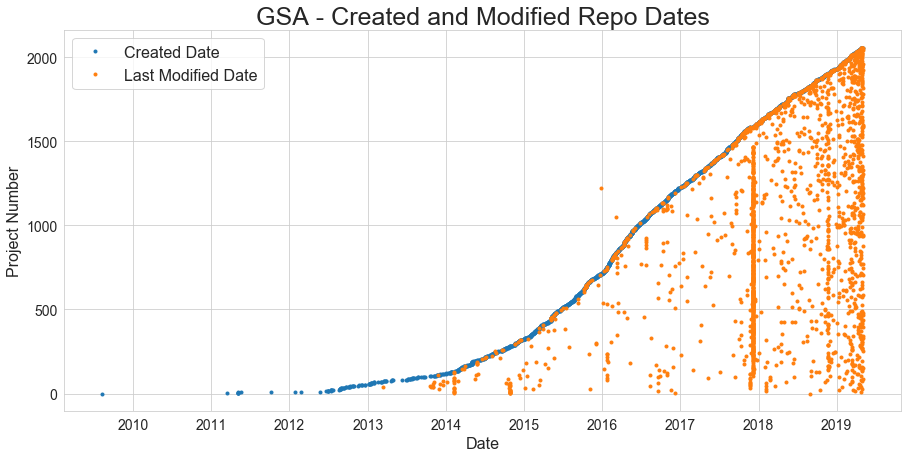

In [12]:
# Plot of GSA repo creation and last modified dates
plt.figure(figsize=(15,7))
plt.plot_date(x=gsa['createDate'], y=gsa.index, ms=3)
plt.plot_date(x=gsa['modifyDate'], y=gsa.index, ms=3)
plt.title('GSA - Created and Modified Repo Dates', size=25)
plt.ylabel('Project Number', size=16)
plt.yticks(size=14)
plt.xlabel('Date', size=16)
plt.xticks(size=14)
plt.legend(['Created Date', 'Last Modified Date'], fontsize=16)
plt.show()

Repo creation has continued fairly steadily from 2015 to present day.  Most repos have been modified after they were first created. Recently, there have been several short time periods (days?) where many projects were updated seemingly at once.  Curiously, there are two projects with **Last Modified Dates** prior to their respective creation dates.

Potential interesting questions to ask:
- What is the rate of code development at the GSA?
- What's the ratio of unmodified to modified projects?


We'll set those questions aside and take a look at the rest of the agencies first.

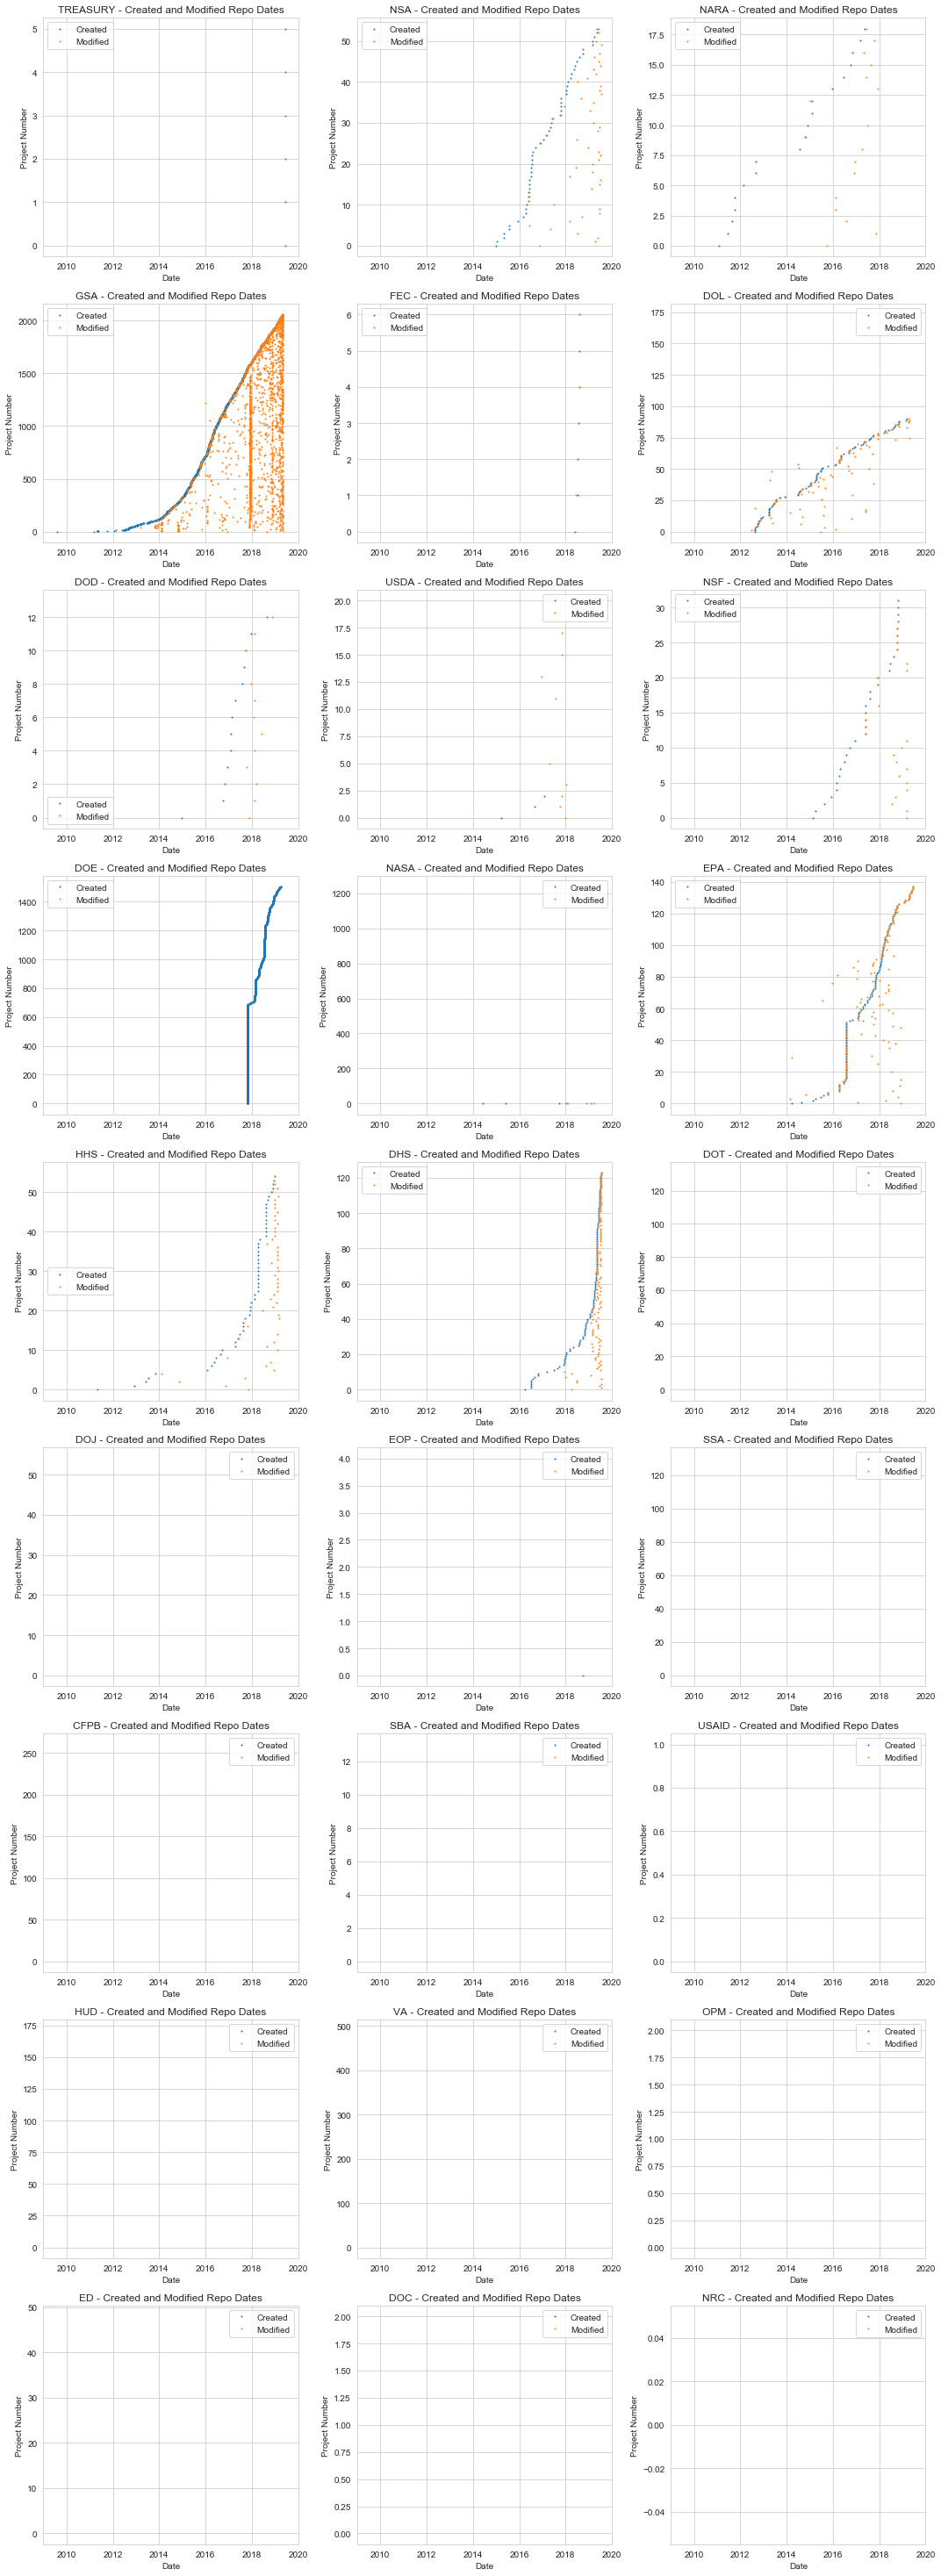

In [13]:
# Plots of repo creation and last modified date for all Agencies

agencies = data['acronym'].unique()

plt.figure(figsize=(15,45))
for idx, agency in enumerate(agencies):
    temp_df = data[data['acronym'] == agency]
    temp_df = temp_df.sort_values(by='createDate').reset_index()
    
    agency_str = str(agency)
    title = (agency_str + ' - Created and Modified Repo Dates')
    
    plt.subplot(10, 3, (idx + 1))
    plt.plot_date(x=temp_df['createDate'], y=temp_df.index, ms=1)
    plt.plot_date(x=temp_df['modifyDate'], y=temp_df.index, ms=1)
    plt.title(title, size=12)
    plt.ylabel('Project Number')
    plt.xlabel('Date')
    plt.xlim(pd.to_datetime('2009-01-01'), pd.to_datetime('2020-01-01'))
    plt.legend(['Created', 'Modified'])
plt.tight_layout()
plt.show()

Many of these agencies don't have any time stamps on their projects, hence the blank plots.  While some agencies seem to have incredibly active staff, do note that the *y-axis* is not consistent across the figure.

Potentially interesting questions to ask:
- Which agencies are the most prolific?
- At what rate are these agencies publishing new code?
- Does each agency tend to maintain it's existing code base or focus on generating new projects?